In [29]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_point, labs, scale_color_brewer, scale_color_distiller, scale_fill_gradient, theme, element_text, ggsave
import numpy as np
import pandas as pd
import Functions

In [2]:
train_size = 0.75
val_size = 0.10
test_size = 0.15

y_train, y_val, y_test, X_train, X_val, X_test = Functions.getSplittedData(['Charge', 'Mass', 'NumAtoms', 'FractionSP3', 'NumRotatableBonds', 'Length'], train_size, val_size, test_size)
features = ['Charge', 'Mass']

In [3]:
svr1 = SVR(kernel='linear', C=1, epsilon=0.1)
svr1.fit(X_train, y_train.ravel())
y_pred = svr1.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.002251195385645898
Mean Absolute Error: 0.04142782624981729
R² Score: 0.9407010842338278


In [4]:
print(X_train)
for feature, coef in zip(X_train.columns, svr1.coef_):
    print(f"{coef}")

          Charge      Mass  NumAtoms  FractionSP3  NumRotatableBonds    Length
0       0.333333  0.300226  0.303448     0.383459           0.298611  0.190476
1       0.333333  0.356470  0.355172     0.604131           0.402778  0.214286
2       0.000000  0.097304  0.093103     0.761905           0.104167  0.023810
3       0.333333  0.221022  0.224138     0.456221           0.208333  0.095238
4       0.333333  0.355782  0.355172     0.720779           0.388889  0.261905
...          ...       ...       ...          ...                ...       ...
108090  0.333333  0.230308  0.213793     0.576355           0.194444  0.166667
108091  0.333333  0.156986  0.137931     0.767442           0.180556  0.047619
108092  0.333333  0.133737  0.137931     0.357143           0.145833  0.023810
108093  0.333333  0.183632  0.168966     0.612245           0.187500  0.071429
108094  0.333333  0.233519  0.227586     0.823129           0.291667  0.119048

[108095 rows x 6 columns]
[ 0.86970943 -0.1630299  

In [5]:
from sklearn.inspection import permutation_importance
result = permutation_importance(svr1, X_val, y_val, n_repeats=10, random_state=42)

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean,
    'StdDev': result.importances_std
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

             Feature  Importance    StdDev
0             Charge    2.587533  0.017918
2           NumAtoms    0.065600  0.000878
1               Mass    0.014412  0.000406
5             Length    0.006140  0.000109
3        FractionSP3    0.003100  0.000105
4  NumRotatableBonds   -0.002508  0.000123


In [8]:
features_test = ['Charge', 'NumAtoms']
svr2 = SVR(kernel='linear', C=1, epsilon=0.1)
svr2.fit(X_train[features_test], y_train.ravel())
y_pred_2 = svr2.predict(X_val[features_test])
mse_2 = mean_squared_error(y_val, y_pred_2)
mae_2 = mean_absolute_error(y_val, y_pred_2)
r2_2 = r2_score(y_val, y_pred_2)

print(f"Mean Squared Error: {mse_2}")
print(f"Mean Absolute Error: {mae_2}")
print(f"R² Score: {r2_2}")

Mean Squared Error: 0.0022929794366168535
Mean Absolute Error: 0.04181556113727992
R² Score: 0.9396004472412794


In [38]:
features = ['Charge', 'Mass']
svr3 = SVR(kernel='linear', C=1, epsilon=0.1)
svr3.fit(X_train[features], y_train.ravel())
y_pred_3 = svr3.predict(X_val[features])
mse_3 = mean_squared_error(y_val, y_pred_3)
mae_3 = mean_absolute_error(y_val, y_pred_3)
r2_3 = r2_score(y_val, y_pred_3)

print(f"Mean Squared Error: {mse_3}")
print(f"Mean Absolute Error: {mae_3}")
print(f"R² Score: {r2_3}")

Mean Squared Error: 0.0022025933049046546
Mean Absolute Error: 0.0409943121705158
R² Score: 0.9419813154879927


In [13]:
svr4 = SVR(kernel='linear')
param_grid = {'C': [1,2,3,4,5,6],
              'epsilon': [0.025, 0.05, 0.1]}
search = HalvingGridSearchCV(svr3, param_grid, cv=5, scoring='r2', random_state=42)
search.fit(X_train[features], y_train.ravel())
print(search.best_params_)


C:\Users\samue\PycharmProjects\PBL_Ion_Mobility\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\samue\PycharmProjects\PBL_Ion_Mobility\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'C': 3, 'epsilon': 0.025}


In [15]:
y_pred_4 = search.predict(X_val[features])
mse_4 = mean_squared_error(y_val, y_pred_4)
mae_4 = mean_absolute_error(y_val, y_pred_4)
r2_4 = r2_score(y_val, y_pred_4)

print(f"Mean Squared Error: {mse_4}")
print(f"Mean Absolute Error: {mae_4}")
print(f"R² Score: {r2_4}")

Mean Squared Error: 0.0006918509544572263
Mean Absolute Error: 0.01963912816445378
R² Score: 0.9817758992699188


In [12]:
svr5 = SVR()
param_dist = { 
    'kernel': ['linear'],
    'C': list(range(1,5)),
    'epsilon': np.arange(0.025, 0.125, 0.025)
}
search2 = RandomizedSearchCV(svr5, param_dist, cv=5, scoring='r2', random_state=42)
search2.fit(X_train[features], y_train.ravel())
search2.best_params_


KeyboardInterrupt: 

In [ ]:
m4 = SVR(kernel='linear', C=2, epsilon=1.2)
m4.fit(X_train[features], y_train.ravel())
y_pred_5 = m4.predict(X_val[features])
mse_5 = mean_squared_error(y_val, y_pred_5)
mae_5 = mean_absolute_error(y_val, y_pred_5)
r2_5 = r2_score(y_val, y_pred_5)

print(f"Mean Squared Error: {mse_4}")
print(f"Mean Absolute Error: {mae_4}")
print(f"R² Score: {r2_4}")

In [19]:
y_pred_fin = search.best_estimator_.predict(X_test[features])
mse_fin = mean_squared_error(y_test, y_pred_fin)
mae_fin = mean_absolute_error(y_test, y_pred_fin)
r2_fin = r2_score(y_test, y_pred_fin)

print(f"Mean Squared Error: {mse_fin}")
print(f"Mean Absolute Error: {mae_fin}")
print(f"R² Score: {r2_fin}")

Mean Squared Error: 0.0006976604417349916
Mean Absolute Error: 0.01977910338605613
R² Score: 0.9816816067923775


C:\Users\samue\PycharmProjects\PBL_Ion_Mobility\.venv\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\samue\PycharmProjects\PBL_Ion_Mobility\.venv\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: C:/Users/samue/OneDrive/Desktop/Ion mobility/SVR_linear.png


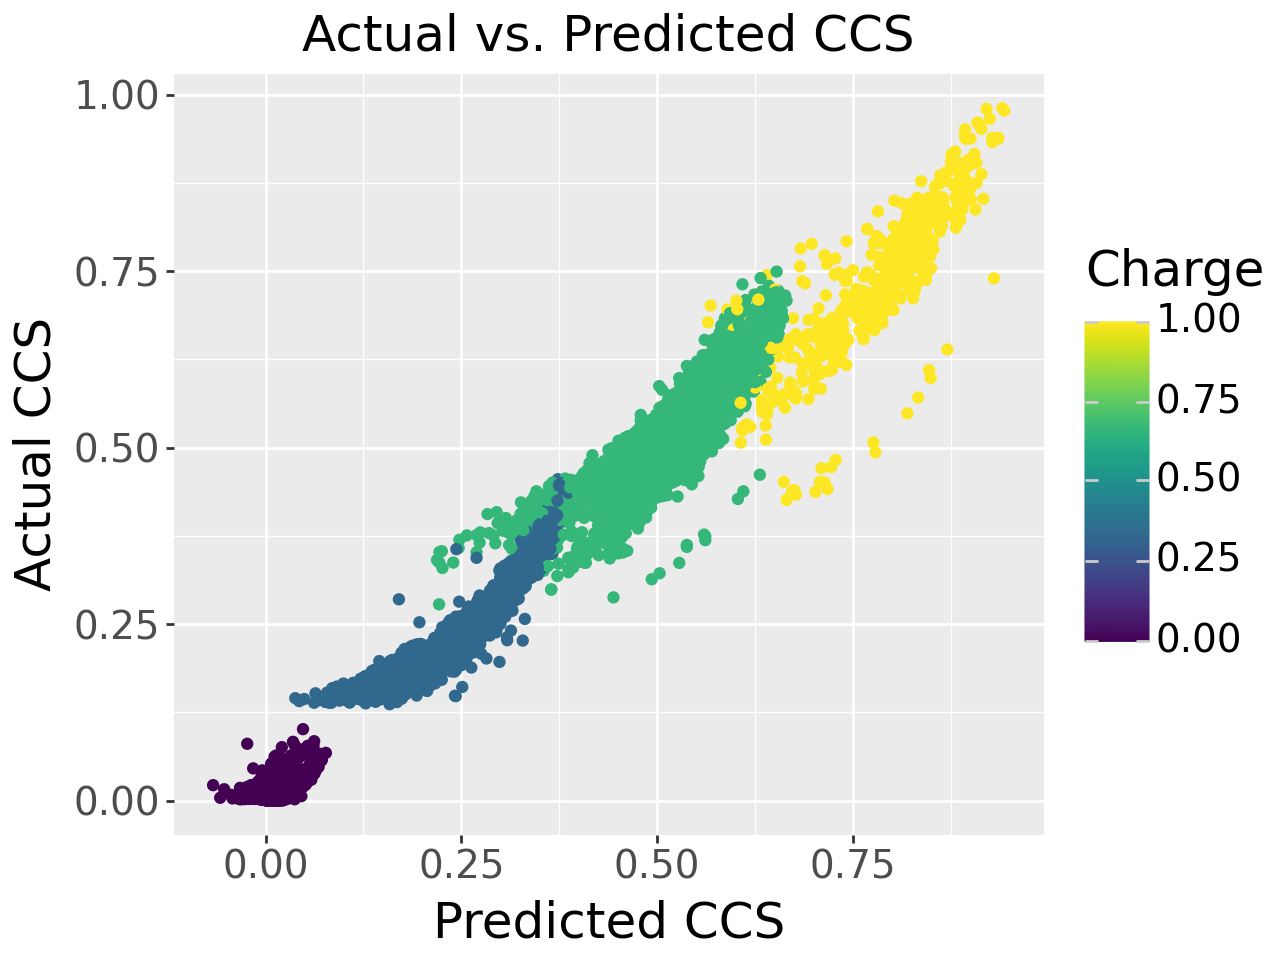

In [43]:

df= pd.DataFrame()
df['Charge'] = X_test['Charge']
df['CCS_pred'] = y_pred_fin
df['CCS_actual'] = y_test
plot1 = (
    ggplot(df, aes(x = "CCS_pred", y = "CCS_actual", color="Charge"))
    +  labs(y = "Actual CCS", x = "Predicted CCS", title="Actual vs. Predicted CCS")
    + geom_point() 
    + theme(
        plot_title=element_text(size=18),         # Schriftgröße des Titels
        axis_title_x=element_text(size=18),       # Schriftgröße der X-Achsenbeschriftung
        axis_title_y=element_text(size=18),       # Schriftgröße der Y-Achsenbeschriftung
        legend_title=element_text(size=18), 
        axis_text_x=element_text(size=14),        # X-axis tick label font size
        axis_text_y=element_text(size=14), # Schriftgröße des Legendentitels
        legend_text=element_text(size=14)         # Schriftgröße des Legendentextes
    )
)
plot1.save(filename='C:/Users/samue/OneDrive/Desktop/Ion mobility/SVR_linear.png', dpi=300)
plot1.show()

In [41]:
rbf = SVR(kernel='rbf', gamma='auto', C=1, epsilon=0.1)
rbf.fit(X_train, y_train.ravel())
y_pred_rbf = rbf.predict(X_val)
mse_rb = mean_squared_error(y_val, y_pred_rbf)
mae_rb = mean_absolute_error(y_val, y_pred_rbf)
r2_rb = r2_score(y_val, y_pred_rbf)

In [42]:
print(f"Mean Squared Error: {mse_rb}")
print(f"Mean Absolute Error: {mae_rb}")
print(f"R² Score: {r2_rb}")

Mean Squared Error: 0.0022454565820790254
Mean Absolute Error: 0.038259983249873834
R² Score: 0.9408522505126325


In [24]:
pol = SVR(kernel='poly', degree=4, gamma='auto', C=3, epsilon=0.05)
pol.fit(X_train[features], y_train.ravel())
pol_pred = pol.predict(X_val[features])
mse_pol = mean_squared_error(y_val, pol_pred)
mae_pol = mean_absolute_error(y_val, pol_pred)
r2_pol = r2_score(y_val, pol_pred)

print(f"Mean Squared Error: {mse_pol}")
print(f"Mean Absolute Error: {mae_pol}")
print(f"R² Score: {r2_pol}")

Mean Squared Error: 0.008969842712092953
Mean Absolute Error: 0.0727171777848949
R² Score: 0.7637246634335989


In [35]:
rbf_fin = SVR(kernel='rbf')
param_grid2 = {
    'gamma': ['auto', 'scale'],
    'C': [2,3,4,5],
    'epsilon': [0.05,0.1, 0.15]
}
search3 = HalvingGridSearchCV(rbf_fin, param_grid2, cv=5, scoring='r2', random_state=42)
search3.fit(X_train[features], y_train.ravel())
search3.best_params_

C:\Users\samue\PycharmProjects\PBL_Ion_Mobility\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
C:\Users\samue\PycharmProjects\PBL_Ion_Mobility\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast


{'C': 4, 'epsilon': 0.05, 'gamma': 'auto'}

Mean Squared Error: 0.000657710892813977
Mean Absolute Error: 0.0195665700821942
R² Score: 0.982730557688579


C:\Users\samue\PycharmProjects\PBL_Ion_Mobility\.venv\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\samue\PycharmProjects\PBL_Ion_Mobility\.venv\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: C:/Users/samue/OneDrive/Desktop/Ion mobility/SVR_rbf.png


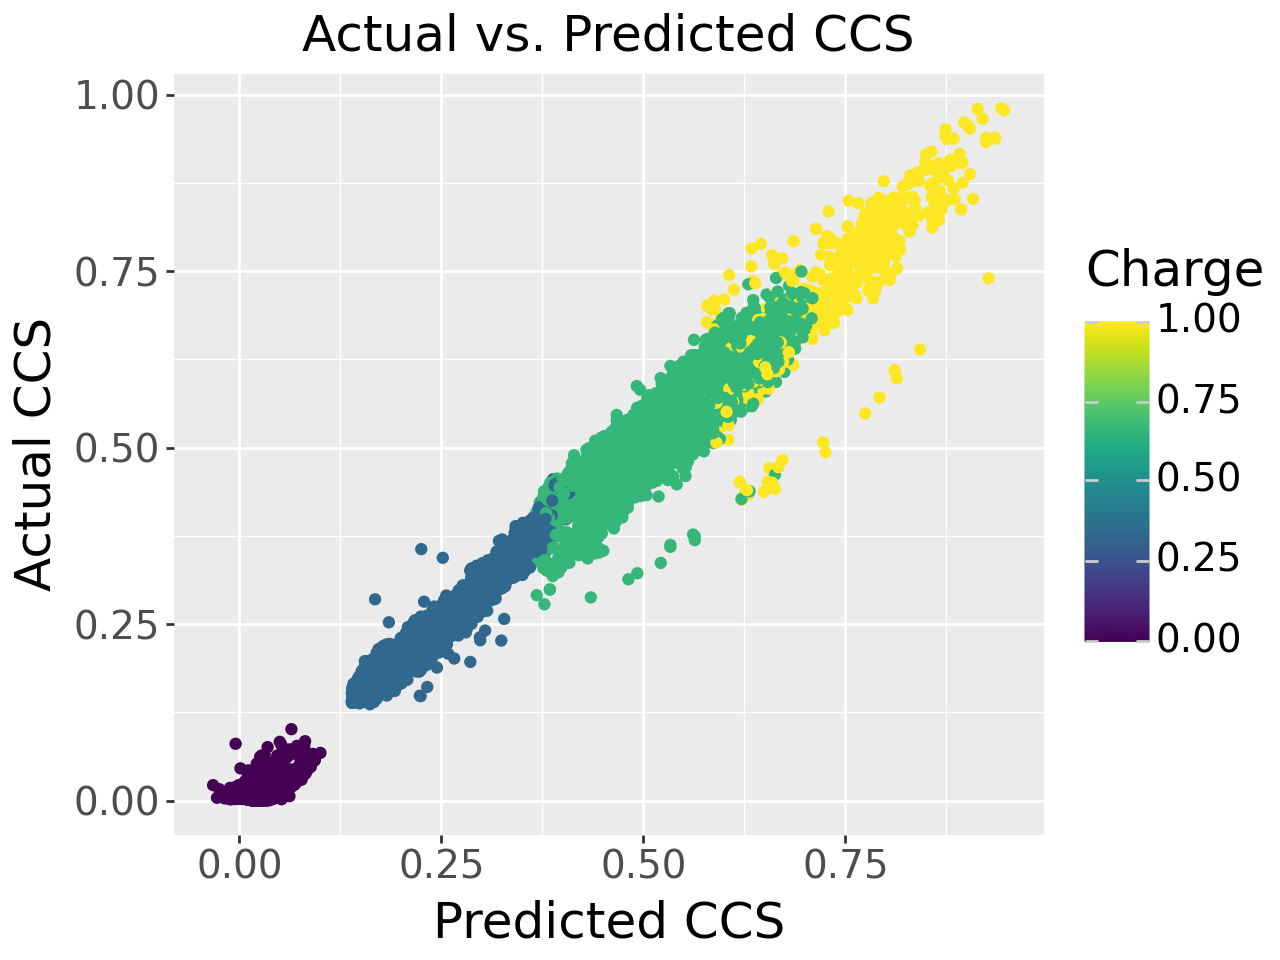

In [37]:
y_pred_fin2 = search3.best_estimator_.predict(X_test[features])
mse_fin2 = mean_squared_error(y_test, y_pred_fin2)
mae_fin2 = mean_absolute_error(y_test, y_pred_fin2)
r2_fin2 = r2_score(y_test, y_pred_fin2)

print(f"Mean Squared Error: {mse_fin2}")
print(f"Mean Absolute Error: {mae_fin2}")
print(f"R² Score: {r2_fin2}")
df= pd.DataFrame()
df['Charge'] = X_test['Charge']
df['CCS_pred'] = y_pred_fin2
df['CCS_actual'] = y_test
plot2 = (
    ggplot(df, aes(x = "CCS_pred", y = "CCS_actual", color="Charge"))
    +  labs(y = "Actual CCS", x = "Predicted CCS", title="Actual vs. Predicted CCS")
    + geom_point() 
    + theme(
        plot_title=element_text(size=18),         # Schriftgröße des Titels
        axis_title_x=element_text(size=18),       # Schriftgröße der X-Achsenbeschriftung
        axis_title_y=element_text(size=18),       # Schriftgröße der Y-Achsenbeschriftung
        legend_title=element_text(size=18), 
        axis_text_x=element_text(size=14),        # X-axis tick label font size
        axis_text_y=element_text(size=14), # Schriftgröße des Legendentitels
        legend_text=element_text(size=14)         # Schriftgröße des Legendentextes
    )
)
plot2.save(filename='C:/Users/samue/OneDrive/Desktop/Ion mobility/SVR_rbf.png', dpi=300)
plot2.show()